In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score, StratifiedKFold, validation_curve
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.metrics import (accuracy_score, roc_auc_score, classification_report, 
                             confusion_matrix, roc_curve, recall_score, precision_score, f1_score)
from sklearn.inspection import permutation_importance
from scipy.stats import loguniform
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier

In [2]:
df = pd.read_csv(r"C:\Users\HP\OneDrive\Masaüstü\büyük veri analizi\WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [3]:
print(df.head())

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df = df.dropna(subset=['TotalCharges'])

In [7]:
df = df.drop('customerID', axis=1)

C:\Users\HP\AppData\Local\Temp\ipykernel_21864\3602827365.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Churn', data=df, palette='viridis')


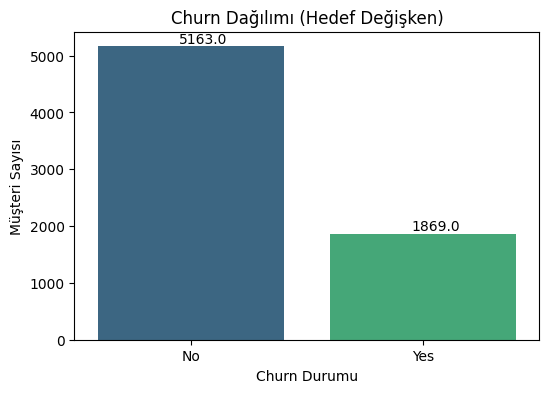

In [8]:
plt.figure(figsize=(6, 4))
ax = sns.countplot(x='Churn', data=df, palette='viridis')
plt.title('Churn Dağılımı (Hedef Değişken)')
plt.xlabel('Churn Durumu')
plt.ylabel('Müşteri Sayısı')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + 0.35, p.get_height() + 50))
plt.show()

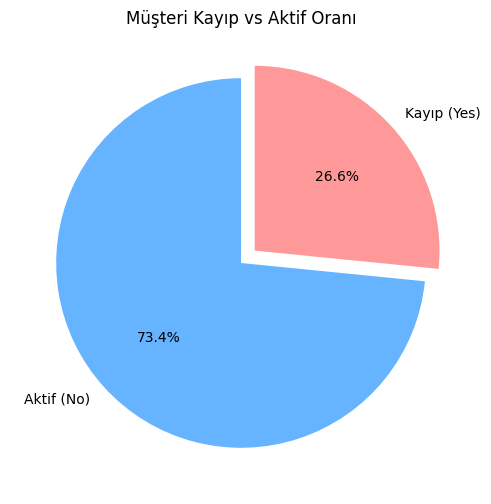

In [9]:
plt.figure(figsize=(6, 6))
churn_counts = df['Churn'].value_counts()
plt.pie(churn_counts, labels=['Aktif (No)', 'Kayıp (Yes)'], autopct='%1.1f%%', 
        colors=['#66b3ff', '#ff9999'], startangle=90, explode=(0, 0.1))
plt.title('Müşteri Kayıp vs Aktif Oranı')
plt.show()

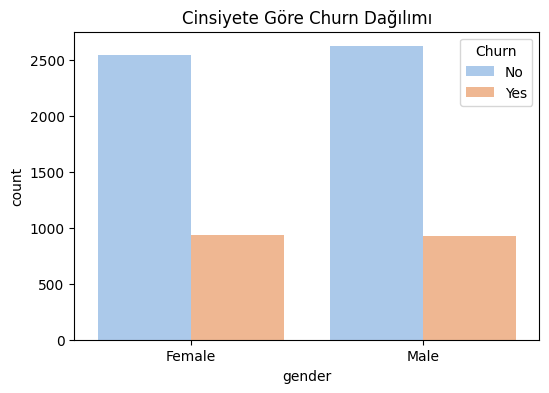

In [10]:
plt.figure(figsize=(6, 4))
sns.countplot(x='gender', hue='Churn', data=df, palette='pastel')
plt.title('Cinsiyete Göre Churn Dağılımı')
plt.show()

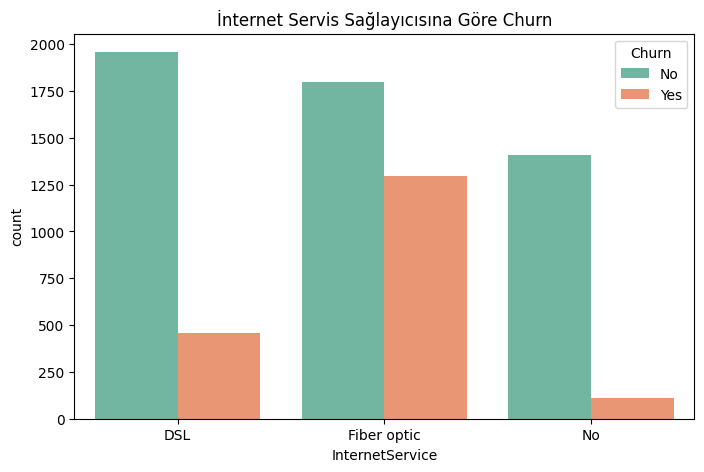

In [11]:
plt.figure(figsize=(8, 5))
sns.countplot(x='InternetService', hue='Churn', data=df, palette='Set2')
plt.title('İnternet Servis Sağlayıcısına Göre Churn')
plt.show()

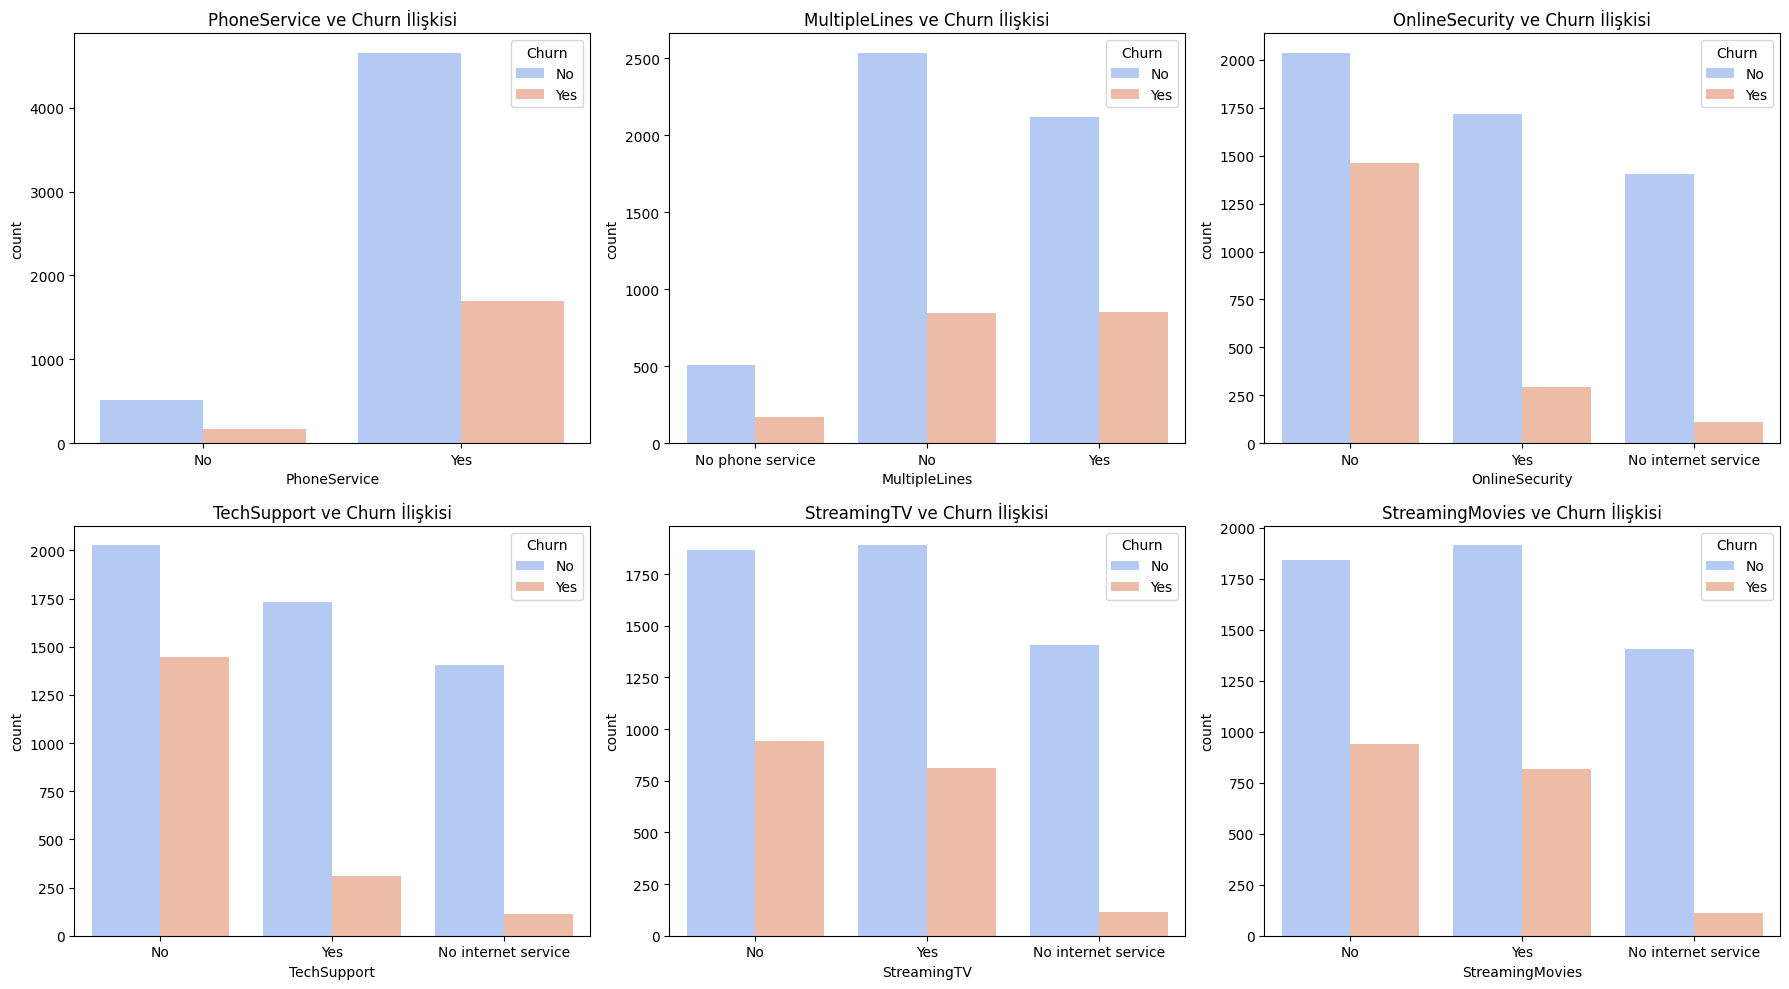

In [12]:
services = ['PhoneService', 'MultipleLines', 'OnlineSecurity', 'TechSupport', 'StreamingTV', 'StreamingMovies']
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
for i, service in enumerate(services):
    sns.countplot(x=service, hue='Churn', data=df, ax=axes[i//3, i%3], palette='coolwarm')
    axes[i//3, i%3].set_title(f'{service} ve Churn İlişkisi')
plt.tight_layout()
plt.show()

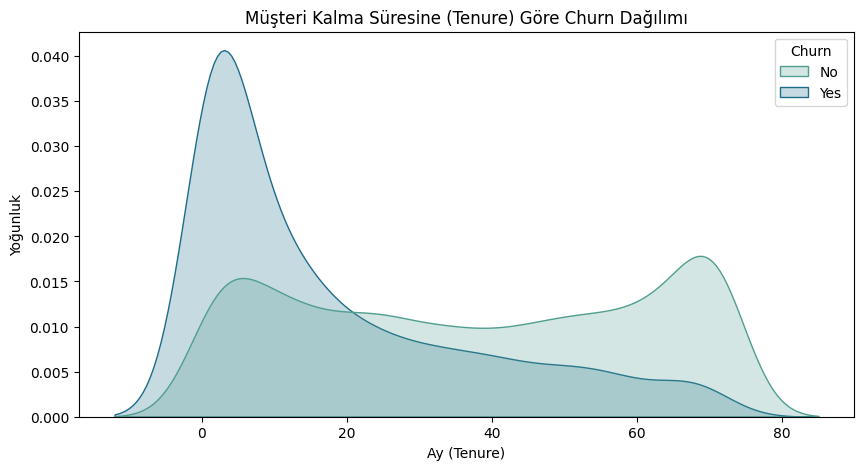

In [13]:
plt.figure(figsize=(10, 5))
sns.kdeplot(data=df, x='tenure', hue='Churn', fill=True, common_norm=False, palette='crest')
plt.title('Müşteri Kalma Süresine (Tenure) Göre Churn Dağılımı')
plt.xlabel('Ay (Tenure)')
plt.ylabel('Yoğunluk')
plt.show()

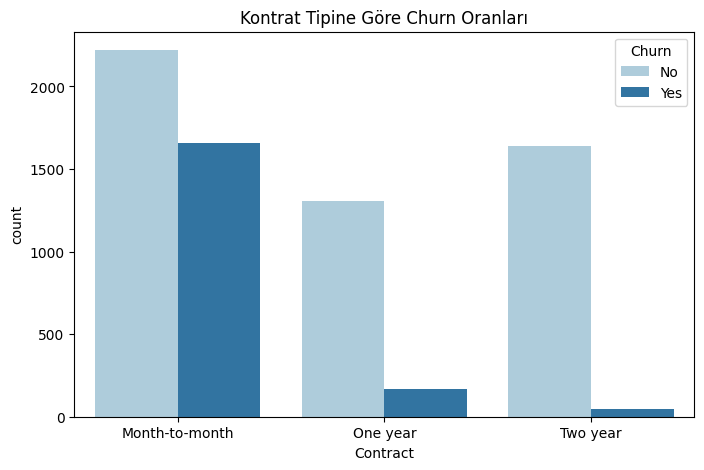

In [14]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Contract', hue='Churn', data=df, palette='Paired')
plt.title('Kontrat Tipine Göre Churn Oranları')
plt.show()



C:\Users\HP\AppData\Local\Temp\ipykernel_21864\237335317.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='InternetService', y='MonthlyCharges', data=df, palette='viridis', ci=None)
C:\Users\HP\AppData\Local\Temp\ipykernel_21864\237335317.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='InternetService', y='MonthlyCharges', data=df, palette='viridis', ci=None)


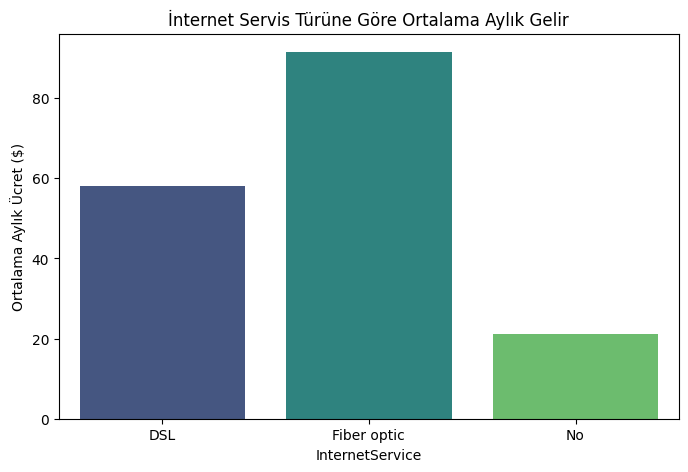

In [15]:
plt.figure(figsize=(8, 5))
sns.barplot(x='InternetService', y='MonthlyCharges', data=df, palette='viridis', ci=None)
plt.title('İnternet Servis Türüne Göre Ortalama Aylık Gelir')
plt.ylabel('Ortalama Aylık Ücret ($)')
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_21864\4009927756.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=total_revenue_by_contract.index, y=total_revenue_by_contract.values, palette='magma')


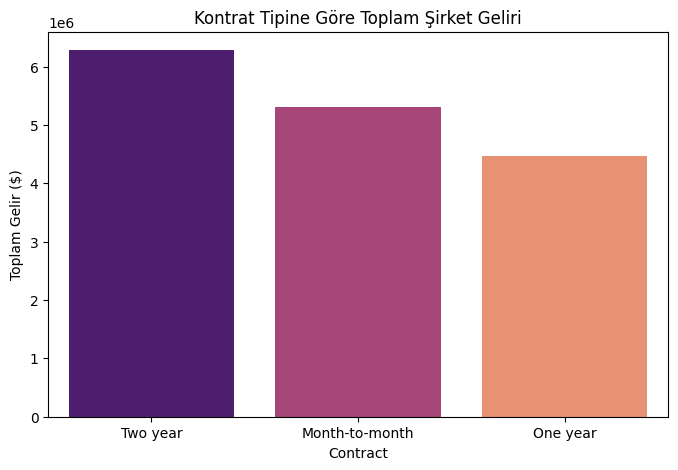

In [16]:
plt.figure(figsize=(8, 5))
total_revenue_by_contract = df.groupby('Contract')['TotalCharges'].sum().sort_values(ascending=False)
sns.barplot(x=total_revenue_by_contract.index, y=total_revenue_by_contract.values, palette='magma')
plt.title('Kontrat Tipine Göre Toplam Şirket Geliri')
plt.ylabel('Toplam Gelir ($)')
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_21864\2324802687.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='MonthlyCharges', data=df, palette='coolwarm')


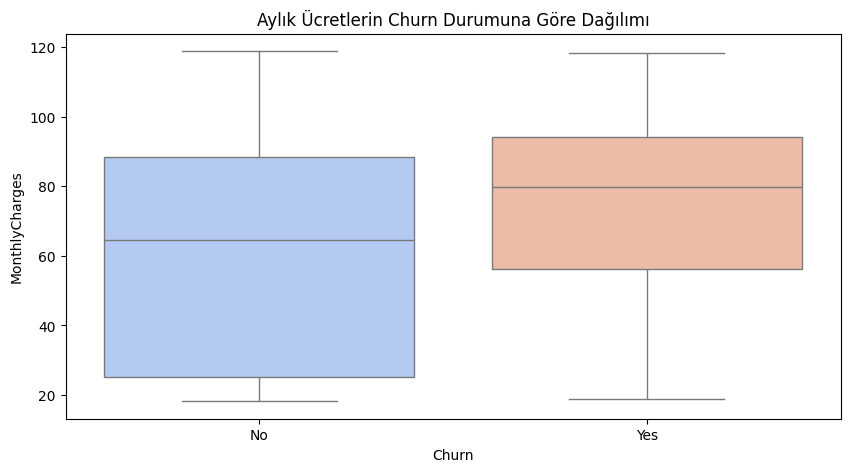

In [17]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='Churn', y='MonthlyCharges', data=df, palette='coolwarm')
plt.title('Aylık Ücretlerin Churn Durumuna Göre Dağılımı')
plt.show()



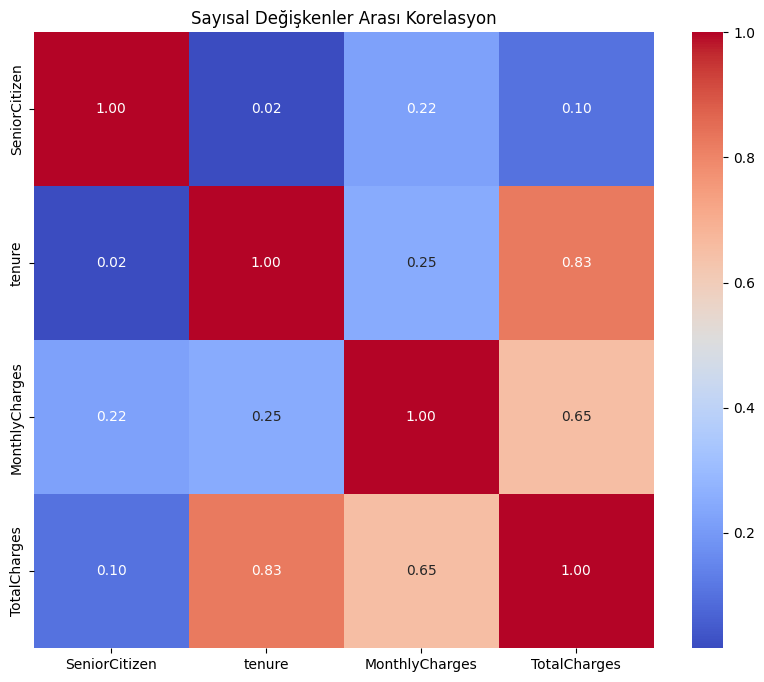

In [18]:
plt.figure(figsize=(10, 8))
numeric_df = df.select_dtypes(include=['float64', 'int64'])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Sayısal Değişkenler Arası Korelasyon')
plt.show()

In [19]:
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
print(f"\nKategorik Sütunlar: {categorical_columns}")
df_encoded = pd.get_dummies(df, drop_first=True)


Kategorik Sütunlar: ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']


In [20]:

X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


scaler = StandardScaler()
scaler.fit(X_train) 


X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [21]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

random forest

In [22]:
rf_model = RandomForestClassifier(n_estimators=500 , oob_score = True, n_jobs = -1,
                                  random_state =50,
                                  max_leaf_nodes = 30)

In [23]:
rf_model.fit(X_train_scaled, y_train)

,n_estimators,500
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,30
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,True


In [ ]:
rf_cv_scores = cross_val_score(rf_model, X_train_scaled, y_train, cv=5, scoring='accuracy', n_jobs=-1) #hiperparametre ölçümü
print(rf_cv_scores)
rf_cv_scores.mean()

[0.79733333 0.82844444 0.80177778 0.78933333 0.784     ]


0.8001777777777779

In [25]:
rf_params = {
    'n_estimators': [500],  
    'max_depth': [30],  
    'min_samples_split': [10],  
    'min_samples_leaf': [4]  
}

In [ ]:
rf_grid_search = GridSearchCV( #hiperparametre iyileştirmesi
    RandomForestClassifier(n_estimators=500 , oob_score = True, n_jobs = -1,
                                  random_state =50,
                                  max_leaf_nodes = 30),
    rf_params,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)
rf_grid_search.fit(X_train_scaled, y_train)

,estimator,RandomForestC...ndom_state=50)
,param_grid,"{'max_depth': [30], 'min_samples_leaf': [4], 'min_samples_split': [10], 'n_estimators': [500]}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,500


In [27]:
rf_grid_search.best_params_

{'max_depth': 30,
 'min_samples_leaf': 4,
 'min_samples_split': 10,
 'n_estimators': 500}

In [28]:
rf_grid_search.best_score_

0.8003555555555556

In [29]:
final_rf= rf_grid_search.best_estimator_

In [30]:
y_pred_rf = final_rf.predict(X_test_scaled)
y_pred_proba_rf = final_rf.predict_proba(X_test_scaled)[:, 1]

rf_accuracy = accuracy_score(y_test, y_pred_rf)

print(f"Test Accuracy: {rf_accuracy:.4f}")
rf_roc_auc = roc_auc_score(y_test, y_pred_proba_rf)
print(f"ROC-AUC Score: {rf_roc_auc:.4f}")

Test Accuracy: 0.7903
ROC-AUC Score: 0.8370


In [31]:
print("\nEn Önemli 10 Özellik:")
rf_feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': final_rf.feature_importances_
}).sort_values('Importance', ascending=False).head(10)
print(rf_feature_importance)


En Önemli 10 Özellik:
                             Feature  Importance
1                             tenure    0.213607
3                       TotalCharges    0.141208
10       InternetService_Fiber optic    0.112642
28    PaymentMethod_Electronic check    0.085962
25                 Contract_Two year    0.078987
2                     MonthlyCharges    0.074369
13                OnlineSecurity_Yes    0.036298
24                 Contract_One year    0.035289
19                   TechSupport_Yes    0.024508
14  OnlineBackup_No internet service    0.019111


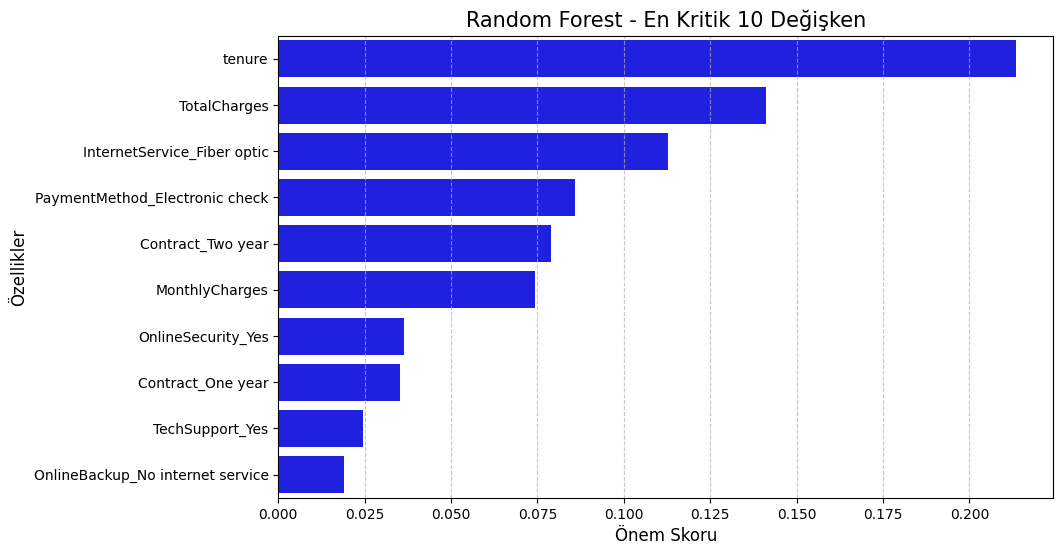

In [32]:
plt.figure(figsize=(10, 6))

sns.barplot(
    x='Importance', 
    y='Feature', 
    data=rf_feature_importance, 
    color='blue'
)

plt.title('Random Forest - En Kritik 10 Değişken', fontsize=15)
plt.xlabel('Önem Skoru', fontsize=12)
plt.ylabel('Özellikler', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

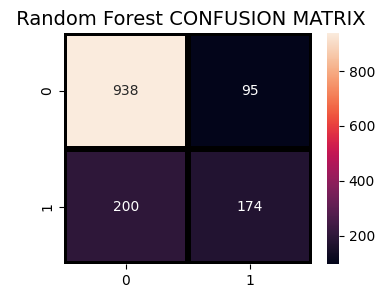

C:\Users\HP\AppData\Local\Temp\ipykernel_21864\1977855293.py:14: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


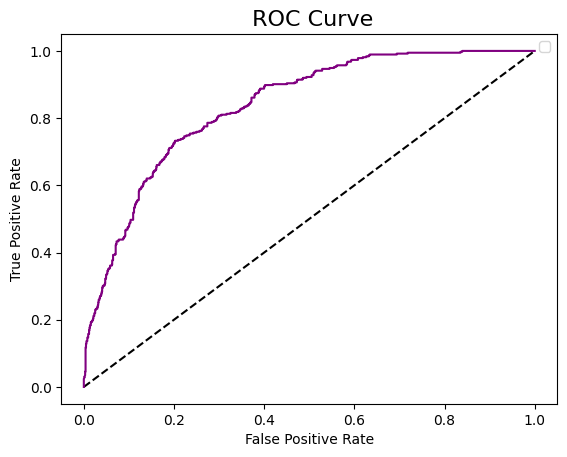

In [33]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, y_pred_rf),
                annot=True, fmt="d", linecolor="k", linewidths=3)
plt.title(" Random Forest CONFUSION MATRIX", fontsize=14)
plt.show()


fpr_rf, tpr_rf, thresholds = roc_curve(y_test, y_pred_proba_rf)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rf , tpr_rf , label='', color="purple")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(' ROC Curve', fontsize=16)
plt.legend()
plt.show()

xgboost

In [34]:
xgb_model = XGBClassifier()

In [35]:
xgb_model.fit(X_train_scaled, y_train)

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [36]:
xgb_cv_scores = cross_val_score(
    xgb_model, 
    X_train_scaled, 
    y_train, 
    cv=5, 
    scoring='accuracy',
    n_jobs=-1
)

In [37]:
print(xgb_cv_scores)
xgb_cv_scores.mean()

[0.77955556 0.78666667 0.78933333 0.768      0.78488889]


0.7816888888888889

In [38]:
xgb_params = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1],
    'n_estimators': [100,200,300],
    'colsample_bytree': [0.7, 1.0],
    'subsample': [0.8, 1.0],
    'min_child_weight': [1, 3]
}


In [39]:
xgb_grid_search = GridSearchCV(
    XGBClassifier(),
    xgb_params,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

In [40]:
xgb_grid_search.fit(X_train_scaled, y_train)

,estimator,"XGBClassifier...ree=None, ...)"
,param_grid,"{'colsample_bytree': [0.7, 1.0], 'learning_rate': [0.01, 0.1], 'max_depth': [3, 5, ...], 'min_child_weight': [1, 3], ...}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,objective,'binary:logistic'


In [41]:
xgb_grid_search.best_params_

{'colsample_bytree': 1.0,
 'learning_rate': 0.1,
 'max_depth': 3,
 'min_child_weight': 3,
 'n_estimators': 100,
 'subsample': 0.8}

In [42]:
xgb_grid_search.best_score_

0.8042666666666667

In [43]:
final_xgb = xgb_grid_search.best_estimator_

In [44]:
y_pred_xgb = final_xgb.predict(X_test_scaled)
y_pred_proba_xgb = final_xgb.predict_proba(X_test_scaled)[:, 1]

xgb_accuracy = accuracy_score(y_test, y_pred_xgb)
print(f"Test Accuracy: {xgb_accuracy:.4f}")


xgb_roc_auc = roc_auc_score(y_test, y_pred_proba_xgb)
print(f"ROC-AUC Score: {xgb_roc_auc:.4f}")

Test Accuracy: 0.7932
ROC-AUC Score: 0.8375


In [45]:
print("\nEn Önemli 10 Özellik:")
xgb_feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': final_xgb.feature_importances_
}).sort_values('Importance', ascending=False).head(10)
print(xgb_feature_importance)


En Önemli 10 Özellik:
                           Feature  Importance
10     InternetService_Fiber optic    0.188385
25               Contract_Two year    0.172043
24               Contract_One year    0.140820
11              InternetService_No    0.075578
1                           tenure    0.068375
28  PaymentMethod_Electronic check    0.067407
26            PaperlessBilling_Yes    0.034539
23             StreamingMovies_Yes    0.028619
21                 StreamingTV_Yes    0.025334
13              OnlineSecurity_Yes    0.024580


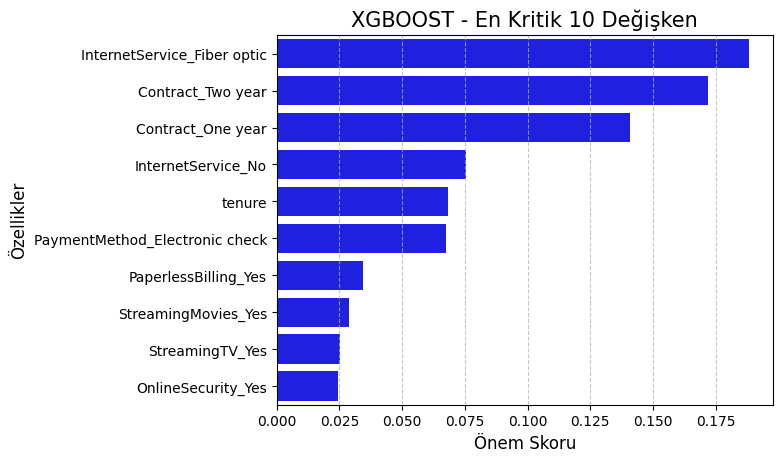

In [46]:
sns.barplot(
    x='Importance', 
    y='Feature', 
    data=xgb_feature_importance, 
    color='blue'
)

plt.title('XGBOOST - En Kritik 10 Değişken', fontsize=15)
plt.xlabel('Önem Skoru', fontsize=12)
plt.ylabel('Özellikler', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

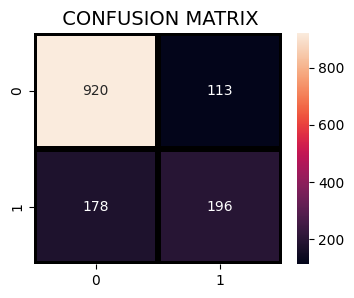

C:\Users\HP\AppData\Local\Temp\ipykernel_21864\496723689.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


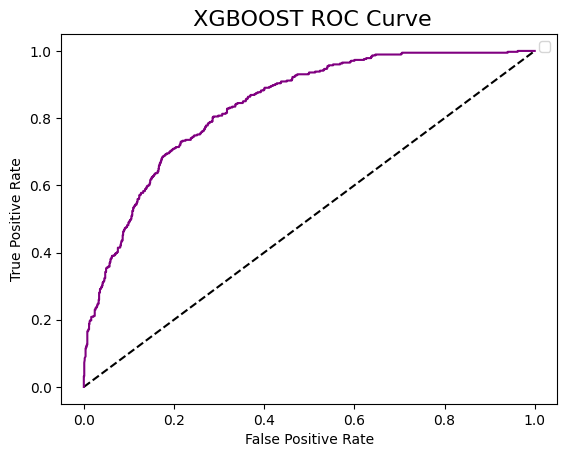

In [47]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, y_pred_xgb),
                annot=True, fmt="d", linecolor="k", linewidths=3)
plt.title(" CONFUSION MATRIX", fontsize=14)
plt.show()

fpr_xgb, tpr_xgb, thresholds = roc_curve(y_test, y_pred_proba_xgb)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_xgb, tpr_xgb, label='', color="purple")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(' XGBOOST ROC Curve', fontsize=16)
plt.legend()
plt.show()

Lojistik Regresyon

In [48]:
lr_model = LogisticRegression(max_iter=1000, random_state=42)

In [49]:
lr_model.fit(X_train_scaled, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [50]:
lr_cv_scores = cross_val_score(lr_model, X_train_scaled, y_train, cv=skf, scoring='accuracy')

In [51]:
print(lr_cv_scores)

[0.81244444 0.79111111 0.78755556 0.80266667 0.81688889]


In [52]:
lr_cv_scores.mean()

0.8021333333333333

In [53]:

lr_params = {
    'C': [0.001, 0.01, 0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['lbfgs']
}

In [54]:
lr_grid_search = GridSearchCV(
    LogisticRegression(max_iter=1000, random_state=42),
    lr_params,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

In [55]:
lr_grid_search.fit(X_train_scaled, y_train)

,estimator,LogisticRegre...ndom_state=42)
,param_grid,"{'C': [0.001, 0.01, ...], 'penalty': ['l2'], 'solver': ['lbfgs']}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,penalty,'l2'


In [56]:
lr_grid_search.best_params_

{'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}

In [57]:
lr_grid_search.best_score_

0.8030222222222223

In [58]:
final_lr = lr_grid_search.best_estimator_

In [59]:
y_pred_lr = final_lr.predict(X_test_scaled)
y_pred_proba_lr = final_lr.predict_proba(X_test_scaled)[:, 1]


lr_accuracy = accuracy_score(y_test, y_pred_lr)
print(f"Test Accuracy: {lr_accuracy:.4f}")


lr_roc_auc = roc_auc_score(y_test, y_pred_proba_lr)
print(f"ROC-AUC Score: {lr_roc_auc:.4f}")


Test Accuracy: 0.7982
ROC-AUC Score: 0.8331


In [60]:
print("\nLojistik Regresyon - En Önemli 10 Özellik:")


lr_feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': final_lr.coef_[0]
})
lr_feature_importance['Abs_Importance'] = lr_feature_importance['Importance'].abs()


lr_feature_importance = lr_feature_importance.sort_values('Abs_Importance', ascending=False).head(10)

print(lr_feature_importance[['Feature', 'Importance']])


Lojistik Regresyon - En Önemli 10 Özellik:
                           Feature  Importance
1                           tenure   -0.561724
25               Contract_Two year   -0.435016
10     InternetService_Fiber optic    0.342214
24               Contract_One year   -0.268736
13              OnlineSecurity_Yes   -0.193856
28  PaymentMethod_Electronic check    0.179274
19                 TechSupport_Yes   -0.175697
26            PaperlessBilling_Yes    0.136040
3                     TotalCharges   -0.135324
2                   MonthlyCharges    0.134575


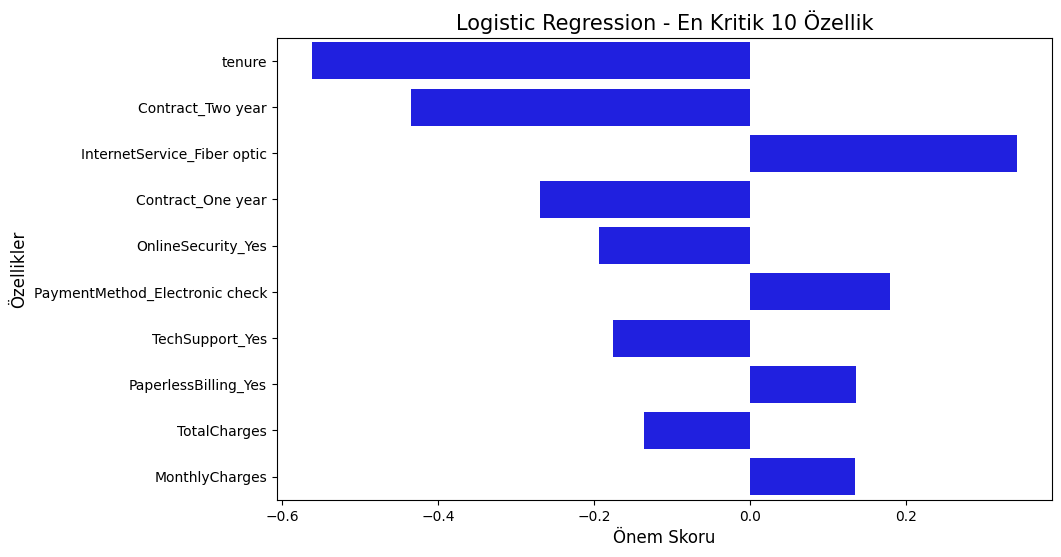

In [61]:
plt.figure(figsize=(10, 6))

sns.barplot(
    x='Importance', 
    y='Feature', 
    data=lr_feature_importance, 
    color='blue'
)

plt.title('Logistic Regression - En Kritik 10 Özellik', fontsize=15)
plt.xlabel('Önem Skoru', fontsize=12)
plt.ylabel('Özellikler', fontsize=12)
plt.show()

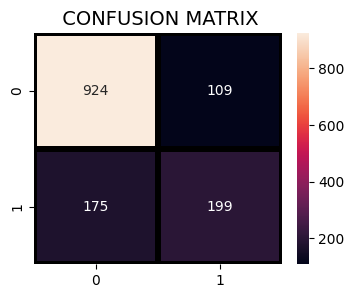

C:\Users\HP\AppData\Local\Temp\ipykernel_21864\3834168361.py:14: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


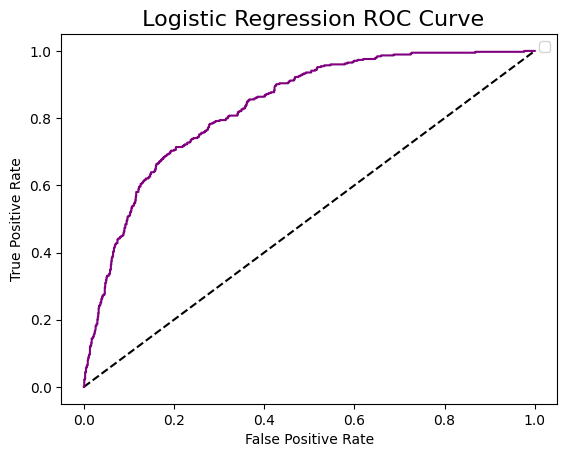

In [62]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, y_pred_lr),
                annot=True, fmt="d", linecolor="k", linewidths=3)
plt.title(" CONFUSION MATRIX", fontsize=14)
plt.show()


fpr_lr, tpr_lr, thresholds = roc_curve(y_test, y_pred_proba_lr)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_lr, tpr_lr, label='', color="purple")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(' Logistic Regression ROC Curve', fontsize=16)
plt.legend()
plt.show()

k en yakın komşular

In [63]:
knn_model = KNeighborsClassifier(n_neighbors = 11) 

In [64]:
knn_model.fit(X_train_scaled,y_train)

,n_neighbors,11
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [65]:
knn_cv_scores = cross_val_score(knn_model, 
                                X_train_scaled, 
                                y_train, 
                                cv=5)
print(knn_cv_scores)
knn_cv_scores.mean()

[0.776      0.78133333 0.76622222 0.75377778 0.77244444]


0.7699555555555555

In [66]:

param_grid = {
    'n_neighbors': range(1, 31),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

knn_grid_search = GridSearchCV(estimator=knn_model, 
                           param_grid=param_grid, 
                           cv=5, 
                           scoring='accuracy', 
                           n_jobs=-1,
                           verbose=1)

In [67]:
knn_grid_search.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 120 candidates, totalling 600 fits


,estimator,KNeighborsCla..._neighbors=11)
,param_grid,"{'metric': ['euclidean', 'manhattan'], 'n_neighbors': range(1, 31), 'weights': ['uniform', 'distance']}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,5
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_neighbors,30


In [68]:
print(knn_grid_search.best_params_)

{'metric': 'manhattan', 'n_neighbors': 30, 'weights': 'uniform'}


In [69]:
predicted_y = knn_model.predict(X_test_scaled)

In [70]:
knn_grid_search.best_score_

0.7882666666666667

In [71]:
final_knn = knn_grid_search.best_estimator_

In [72]:
y_pred_knn = final_knn.predict(X_test_scaled)
y_pred_proba_knn = final_knn.predict_proba(X_test_scaled)[:, 1]


knn_accuracy = accuracy_score(y_test, y_pred_knn)
print(f"Test Accuracy: {knn_accuracy:.4f}")

knn_roc_auc = roc_auc_score(y_test, y_pred_proba_knn)
print(f"ROC-AUC Score: {knn_roc_auc:.4f}")


Test Accuracy: 0.7918
ROC-AUC Score: 0.8237


In [73]:
knn_results = permutation_importance(final_knn, X_test_scaled, y_test, n_repeats=10, random_state=42)

knn_feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': knn_results.importances_mean
})

knn_feature_importance = knn_feature_importance.sort_values('Importance', ascending=False).head(10)

print("\nK-NN - En Önemli 10 Özellik (Permutation Importance):")
print(knn_feature_importance)


K-NN - En Önemli 10 Özellik (Permutation Importance):
                           Feature  Importance
10     InternetService_Fiber optic    0.010945
1                           tenure    0.010803
13              OnlineSecurity_Yes    0.009382
3                     TotalCharges    0.008671
4                      gender_Male    0.006610
19                 TechSupport_Yes    0.006041
24               Contract_One year    0.005330
2                   MonthlyCharges    0.005117
28  PaymentMethod_Electronic check    0.004904
21                 StreamingTV_Yes    0.004762


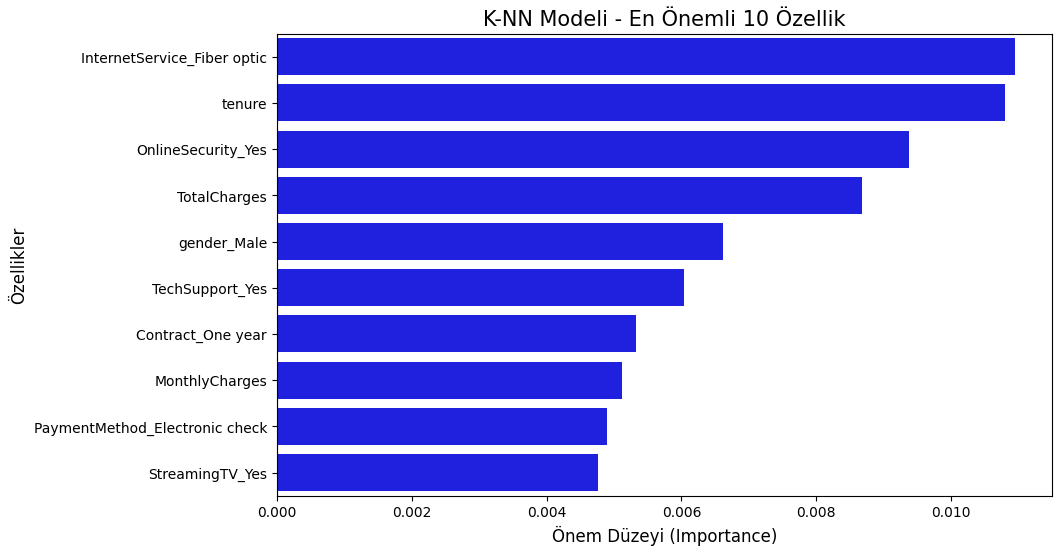

In [74]:
plt.figure(figsize=(10, 6))
sns.barplot(
    x='Importance', 
    y='Feature', 
    data=knn_feature_importance, 
    color= "blue"
)
plt.title('K-NN Modeli - En Önemli 10 Özellik', fontsize=15)
plt.xlabel('Önem Düzeyi (Importance)', fontsize=12)
plt.ylabel('Özellikler', fontsize=12)
plt.axvline(x=0, color='black', linestyle='--', linewidth=0.8)
plt.show()

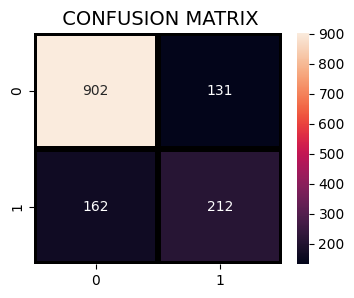

C:\Users\HP\AppData\Local\Temp\ipykernel_21864\312855734.py:14: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


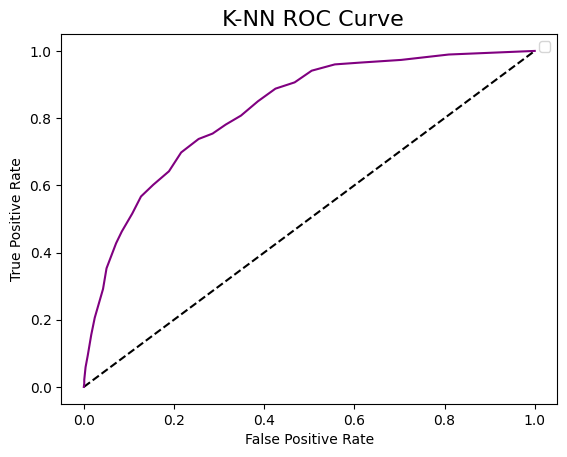

In [75]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, y_pred_knn),
                annot=True, fmt="d", linecolor="k", linewidths=3)
plt.title(" CONFUSION MATRIX", fontsize=14)
plt.show()


fpr_knn, tpr_knn, thresholds = roc_curve(y_test, y_pred_proba_knn)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_knn, tpr_knn, label='', color="purple")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(' K-NN ROC Curve', fontsize=16)
plt.legend()
plt.show()

SVC

In [76]:
svc_model = SVC(random_state = 1)

In [77]:
svc_model.fit(X_train_scaled, y_train)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [78]:
svc_cv_scores = cross_val_score(svc_model, X_train_scaled, y_train, cv=5, scoring='accuracy', n_jobs=-1)
print(svc_cv_scores)
svc_cv_scores.mean()

[0.79022222 0.82311111 0.80266667 0.78755556 0.80444444]


0.8016

In [79]:
svc_params = {
    'C': loguniform(0.1, 100),  
    'gamma': loguniform(0.001, 1),  
    'kernel': ['rbf']
}

In [80]:
svc_random_search = RandomizedSearchCV(
    SVC(random_state=42, probability=True),
    svc_params,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)
svc_random_search.fit(X_train_scaled, y_train)

,estimator,SVC(probabili...ndom_state=42)
,param_distributions,"{'C': <scipy.stats....00168026B3B90>, 'gamma': <scipy.stats....0016804E672C0>, 'kernel': ['rbf']}"
,n_iter,10
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,random_state,None
,error_score,nan


In [81]:
svc_random_search.best_params_  

{'C': 0.3595741046980524, 'gamma': 0.012575065782687616, 'kernel': 'rbf'}

In [82]:
svc_random_search.best_score_ 

0.7994666666666667

In [83]:
final_svc = svc_random_search.best_estimator_

In [84]:
y_pred_svc = final_svc.predict(X_test_scaled)
y_pred_proba_svc = final_svc.predict_proba(X_test_scaled)[:, 1]

svc_accuracy = accuracy_score(y_test, y_pred_svc)
print(f"Test Accuracy: {svc_accuracy:.4f}")


svc_roc_auc = roc_auc_score(y_test, y_pred_proba_svc)
print(f"ROC-AUC Score: {svc_roc_auc:.4f}")

Test Accuracy: 0.7925
ROC-AUC Score: 0.8141


In [85]:
print("\nSVC - En Önemli 10 Özellik (Permutation Importance):")


svc_importance = permutation_importance(final_svc, X_test_scaled, y_test, n_repeats=5, random_state=42)

svc_feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': svc_importance.importances_mean
})

svc_feature_importance = svc_feature_importance.sort_values('Importance', ascending=False).head(10)

print(svc_feature_importance)


SVC - En Önemli 10 Özellik (Permutation Importance):
                           Feature  Importance
10     InternetService_Fiber optic    0.027576
1                           tenure    0.017484
3                     TotalCharges    0.007818
28  PaymentMethod_Electronic check    0.006112
24               Contract_One year    0.005259
19                 TechSupport_Yes    0.002985
0                    SeniorCitizen    0.001990
8   MultipleLines_No phone service    0.001279
7                 PhoneService_Yes    0.001279
26            PaperlessBilling_Yes    0.001137


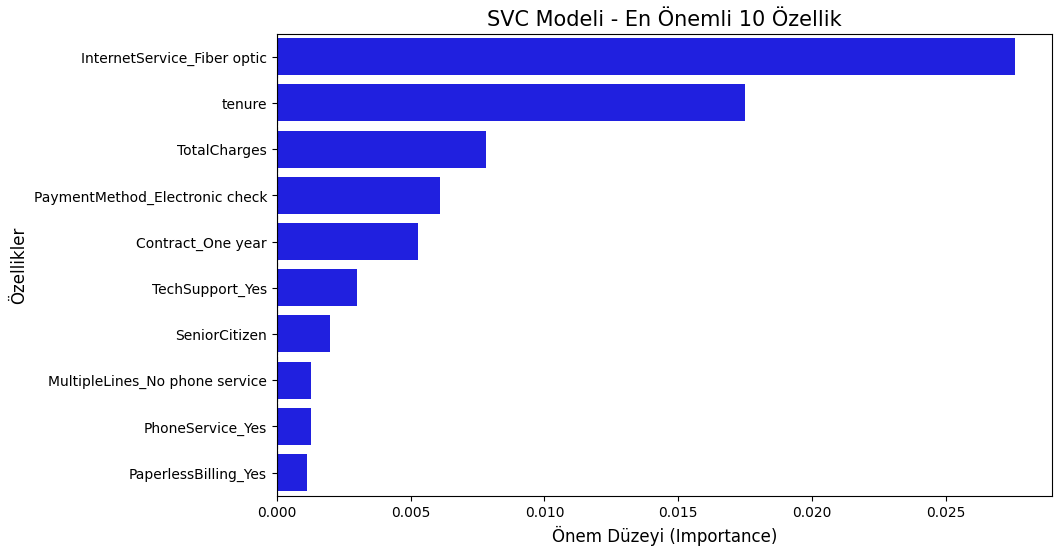

In [86]:
plt.figure(figsize=(10, 6))
sns.barplot(
    x='Importance', 
    y='Feature', 
    data=svc_feature_importance, 
    color= "blue"
)
plt.title('SVC Modeli - En Önemli 10 Özellik', fontsize=15)
plt.xlabel('Önem Düzeyi (Importance)', fontsize=12)
plt.ylabel('Özellikler', fontsize=12)
plt.axvline(x=0, color='black', linestyle='--', linewidth=0.8)
plt.show()

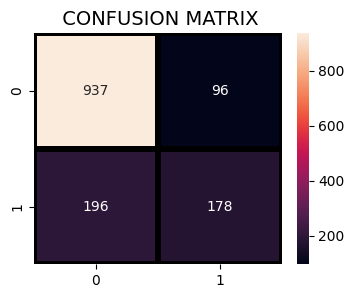

C:\Users\HP\AppData\Local\Temp\ipykernel_21864\1041401896.py:14: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


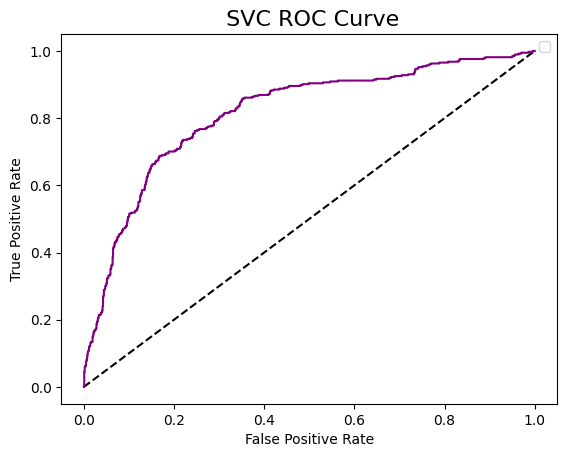

In [87]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, y_pred_svc),
                annot=True, fmt="d", linecolor="k", linewidths=3)
plt.title(" CONFUSION MATRIX", fontsize=14)
plt.show()


fpr_svc, tpr_svc, thresholds = roc_curve(y_test, y_pred_proba_svc)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_svc, tpr_svc, label='', color="purple")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(' SVC ROC Curve', fontsize=16)
plt.legend()
plt.show()

CART

In [88]:
dt_model = DecisionTreeClassifier(random_state=42)

In [89]:
dt_model.fit(X_train_scaled, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [90]:
dt_cv_scores = cross_val_score(dt_model, X_train_scaled, y_train, cv=5, scoring='accuracy', n_jobs=-1)
print(dt_cv_scores)
dt_cv_scores.mean()

[0.74311111 0.73955556 0.71822222 0.72977778 0.73866667]


0.7338666666666666

In [91]:
dt_params = {
    'criterion': ['gini', 'entropy'], 
    'max_depth': [3,5,7,10, None],  
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [1, 2, 4,6]  
}

In [92]:
dt_grid_search = GridSearchCV(
    estimator= DecisionTreeClassifier(random_state=42),
    param_grid= dt_params,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)
dt_grid_search.fit(X_train_scaled, y_train)

,estimator,DecisionTreeC...ndom_state=42)
,param_grid,"{'criterion': ['gini', 'entropy'], 'max_depth': [3, 5, ...], 'min_samples_leaf': [1, 2, ...], 'min_samples_split': [2, 5, ...]}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'gini'


In [93]:
dt_grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 3,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [94]:
dt_grid_search.best_score_

0.7905777777777778

In [95]:
final_dt= dt_grid_search.best_estimator_

In [96]:
y_pred_dt = final_dt.predict(X_test_scaled)
y_pred_proba_dt = final_dt.predict_proba(X_test_scaled)[:, 1]

dt_accuracy = accuracy_score(y_test, y_pred_dt)
print(f"Test Accuracy: {dt_accuracy:.4f}")

dt_roc_auc = roc_auc_score(y_test, y_pred_proba_dt)
print(f"ROC-AUC Score: {dt_roc_auc:.4f}")

Test Accuracy: 0.7846
ROC-AUC Score: 0.8101


In [97]:
print("\nEn Önemli 10 Özellik:")
dt_feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': final_dt.feature_importances_
}).sort_values('Importance', ascending=False).head(10)
print(dt_feature_importance)


En Önemli 10 Özellik:
                                  Feature  Importance
1                                  tenure    0.544034
10            InternetService_Fiber optic    0.417721
3                            TotalCharges    0.026069
25                      Contract_Two year    0.012176
0                           SeniorCitizen    0.000000
17                   DeviceProtection_Yes    0.000000
28         PaymentMethod_Electronic check    0.000000
27  PaymentMethod_Credit card (automatic)    0.000000
26                   PaperlessBilling_Yes    0.000000
24                      Contract_One year    0.000000


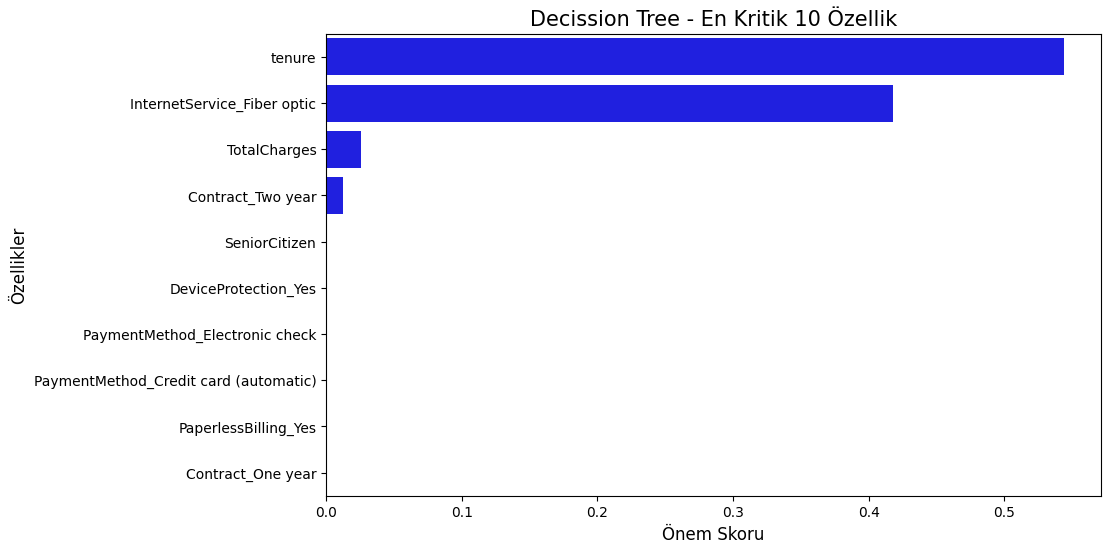

In [98]:
plt.figure(figsize=(10, 6))

sns.barplot(
    x='Importance', 
    y='Feature', 
    data= dt_feature_importance, 
    color='blue'
)

plt.title('Decission Tree - En Kritik 10 Özellik', fontsize=15)
plt.xlabel('Önem Skoru', fontsize=12)
plt.ylabel('Özellikler', fontsize=12)
plt.show()

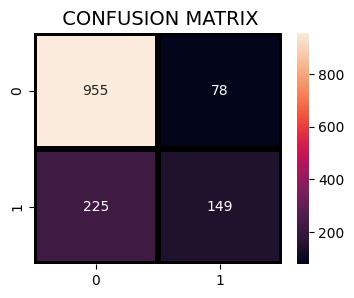

C:\Users\HP\AppData\Local\Temp\ipykernel_21864\1434395984.py:14: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


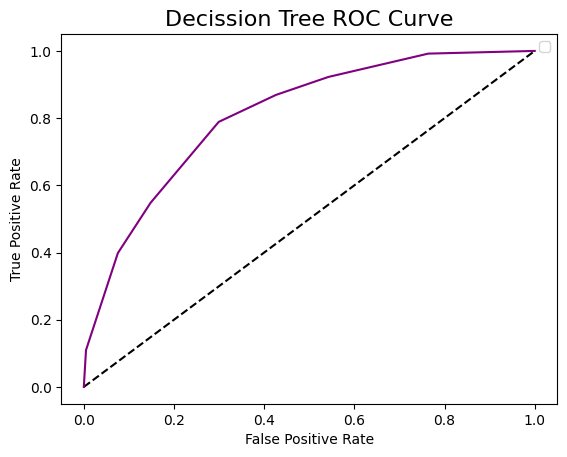

In [99]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, y_pred_dt),
                annot=True, fmt="d", linecolor="k", linewidths=3)
plt.title(" CONFUSION MATRIX", fontsize=14)
plt.show()


fpr_dt, tpr_dt, thresholds = roc_curve(y_test, y_pred_proba_dt)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_dt, tpr_dt, label='', color="purple")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decission Tree ROC Curve', fontsize=16)
plt.legend()
plt.show()

Naive Bayes

In [100]:
nb_model = GaussianNB()
nb_model.fit(X_train_scaled, y_train)

,priors,None
,var_smoothing,1e-09


In [101]:
nb_pipeline_cv_scores = cross_val_score(nb_model, X_train_scaled, y_train, cv=5, scoring='accuracy', n_jobs=-1)
print(nb_pipeline_cv_scores)
nb_pipeline_cv_scores.mean()

[0.66666667 0.66933333 0.68088889 0.65777778 0.67111111]


0.6691555555555555

In [102]:
nb_params = {
    'var_smoothing': np.logspace(0, -9, num=100) 
}

In [103]:
nb_grid_search = GridSearchCV(
    estimator= GaussianNB(),
    param_grid=nb_params,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)
nb_grid_search.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


,estimator,GaussianNB()
,param_grid,{'var_smoothing': array([1.0000...00000000e-09])}
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,5
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,priors,None


In [104]:
nb_grid_search.best_params_

{'var_smoothing': 0.008111308307896872}

In [105]:
nb_grid_search.best_score_

0.6691555555555555

In [106]:
final_nb= nb_grid_search.best_estimator_

In [107]:
y_pred_nb = final_nb.predict(X_test_scaled)
y_pred_proba_nb = final_nb.predict_proba(X_test_scaled)[:, 1]

nb_accuracy = accuracy_score(y_test, y_pred_nb)
print(f"Test Accuracy: {nb_accuracy:.4f}")

nb_roc_auc = roc_auc_score(y_test, y_pred_proba_nb)
print(f"ROC-AUC Score: {nb_roc_auc:.4f}")

Test Accuracy: 0.6439
ROC-AUC Score: 0.8102


In [108]:
print("\nNaive Bayes - En Önemli 10 Özellik:")

nb_results = permutation_importance(final_nb, X_test_scaled, y_test, n_repeats=10, random_state=42)


nb_feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': nb_results.importances_mean
})


nb_feature_importance = nb_feature_importance.sort_values('Importance', ascending=False).head(10)
print(nb_feature_importance)



Naive Bayes - En Önemli 10 Özellik:
                           Feature  Importance
24               Contract_One year    0.021393
25               Contract_Two year    0.012082
13              OnlineSecurity_Yes    0.004478
1                           tenure    0.003269
19                 TechSupport_Yes    0.001493
5                      Partner_Yes    0.000569
15                OnlineBackup_Yes    0.000498
4                      gender_Male    0.000355
17            DeviceProtection_Yes   -0.000071
28  PaymentMethod_Electronic check   -0.000142


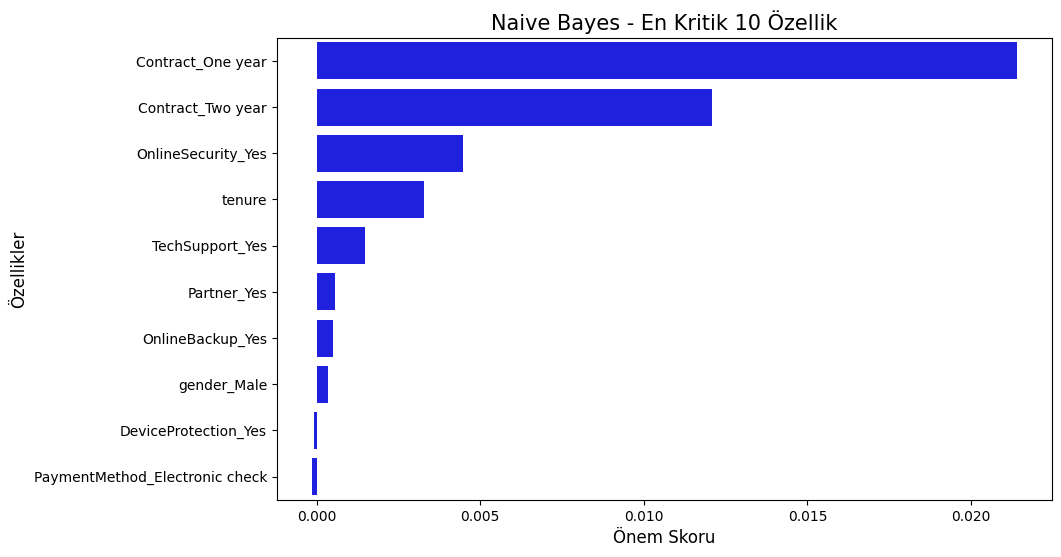

In [109]:
plt.figure(figsize=(10, 6))

sns.barplot(
    x='Importance', 
    y='Feature', 
    data=nb_feature_importance, 
    color='blue' 
)

plt.title('Naive Bayes - En Kritik 10 Özellik', fontsize=15)
plt.xlabel('Önem Skoru', fontsize=12)
plt.ylabel('Özellikler', fontsize=12)
plt.show()

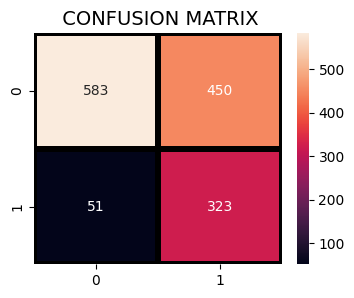

C:\Users\HP\AppData\Local\Temp\ipykernel_21864\1907711982.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


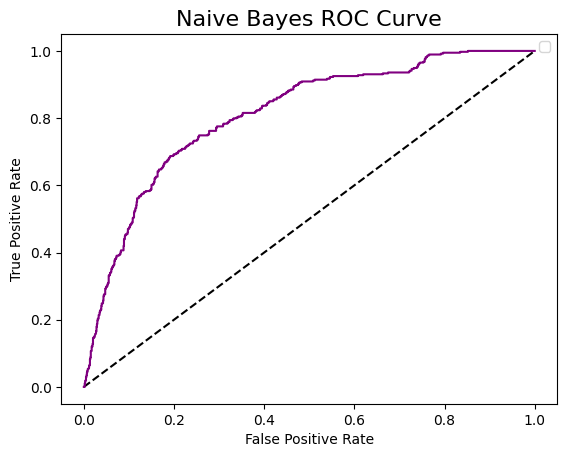

In [110]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, y_pred_nb),
                annot=True, fmt="d", linecolor="k", linewidths=3)
plt.title(" CONFUSION MATRIX", fontsize=14)
plt.show()

fpr_nb, tpr_nb, thresholds = roc_curve(y_test, y_pred_proba_nb)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_nb, tpr_nb, label='', color="purple")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Naive Bayes ROC Curve', fontsize=16)
plt.legend()
plt.show()

Adaboost

In [111]:
ada_model = AdaBoostClassifier(random_state=42)

In [112]:
ada_model.fit(X_train_scaled, y_train)

,estimator,None
,n_estimators,50
,learning_rate,1.0
,algorithm,'deprecated'
,random_state,42


In [113]:
ada_cv_scores = cross_val_score(ada_model, X_train_scaled, y_train, cv=5)
print(ada_cv_scores)
ada_cv_scores.mean()

[0.784      0.81777778 0.80444444 0.77955556 0.79822222]


0.7968000000000001

In [114]:
ada_params = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.001, 0.01, 0.1],
    }

In [115]:
ada_grid_search = GridSearchCV(
    estimator= ada_model, 
    param_grid = ada_params,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1 )
ada_grid_search.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


,estimator,AdaBoostClass...ndom_state=42)
,param_grid,"{'learning_rate': [0.001, 0.01, ...], 'n_estimators': [50, 100, ...]}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,5
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,estimator,None


In [116]:
ada_grid_search.best_params_

{'learning_rate': 0.1, 'n_estimators': 200}

In [117]:
ada_grid_search.best_score_

0.7930666666666667

In [118]:
final_ada= ada_grid_search.best_estimator_

In [119]:
y_pred_ada = final_ada.predict(X_test_scaled)
y_pred_proba_ada = final_ada.predict_proba(X_test_scaled)[:, 1]

ada_accuracy = accuracy_score(y_test, y_pred_ada)
print(f"Test Accuracy: {ada_accuracy:.4f}")

ada_roc_auc = roc_auc_score(y_test, y_pred_proba_ada)
print(f"ROC-AUC Score: {ada_roc_auc:.4f}")

Test Accuracy: 0.7875
ROC-AUC Score: 0.8359


In [120]:
print("\nEn Önemli 10 Özellik:")
ada_feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': final_ada.feature_importances_
}).sort_values('Importance', ascending=False).head(10)
print(ada_feature_importance)


En Önemli 10 Özellik:
                                Feature  Importance
25                    Contract_Two year    0.439616
1                                tenure    0.210424
10          InternetService_Fiber optic    0.130114
24                    Contract_One year    0.061075
28       PaymentMethod_Electronic check    0.040860
11                   InternetService_No    0.021183
12   OnlineSecurity_No internet service    0.019574
22  StreamingMovies_No internet service    0.017754
13                   OnlineSecurity_Yes    0.013283
14     OnlineBackup_No internet service    0.011914


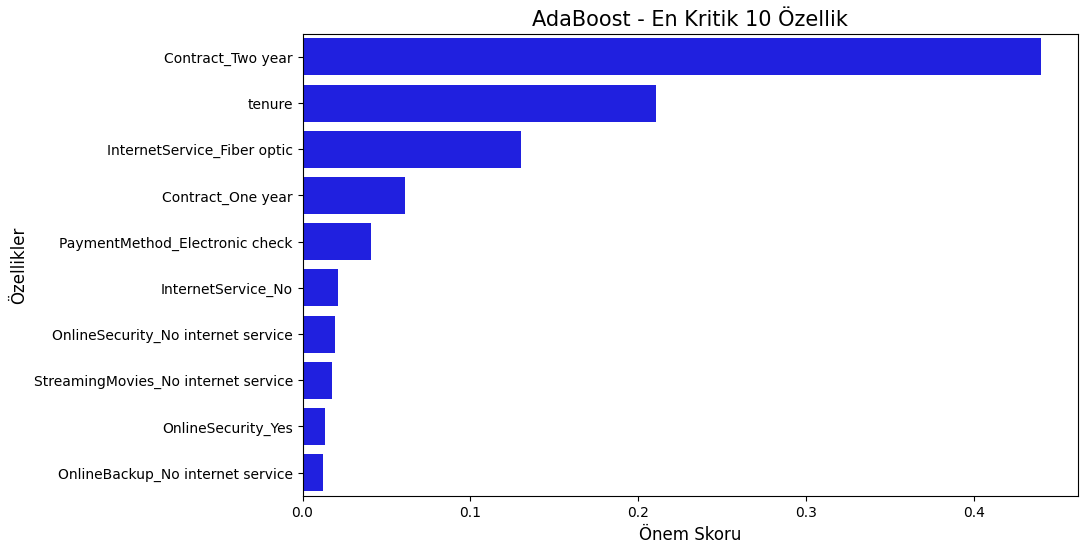

In [121]:
plt.figure(figsize=(10, 6))

sns.barplot(
    x='Importance', 
    y='Feature', 
    data=ada_feature_importance, 
    color='blue'
)

plt.title('AdaBoost - En Kritik 10 Özellik', fontsize=15)
plt.xlabel('Önem Skoru', fontsize=12)
plt.ylabel('Özellikler', fontsize=12)
plt.show()

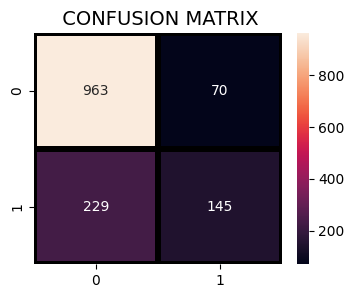

C:\Users\HP\AppData\Local\Temp\ipykernel_21864\1574496547.py:14: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


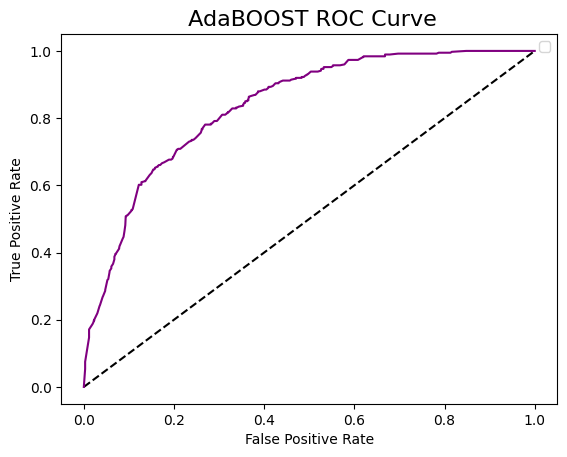

In [122]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, y_pred_ada),
                annot=True, fmt="d", linecolor="k", linewidths=3)
plt.title(" CONFUSION MATRIX", fontsize=14)
plt.show()


fpr_ada, tpr_ada, thresholds = roc_curve(y_test, y_pred_proba_ada)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_ada, tpr_ada, label='', color="purple")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(' AdaBOOST ROC Curve', fontsize=16)
plt.legend()
plt.show()

YAPAY SİNİR AĞLARI (MLPClassifier)

In [123]:
mlpc_model = MLPClassifier(random_state=60, max_iter=1000)

In [124]:
mlpc_model.fit(X_train_scaled, y_train)

,hidden_layer_sizes,"(100,)"
,activation,'relu'
,solver,'adam'
,alpha,0.0001
,batch_size,'auto'
,learning_rate,'constant'
,learning_rate_init,0.001
,power_t,0.5
,max_iter,1000
,shuffle,True
,random_state,60


In [125]:
mlpc_cv_scores = cross_val_score(mlpc_model, X_train_scaled, y_train, cv=5, scoring='accuracy')

In [126]:
print(mlpc_cv_scores)
mlpc_cv_scores.mean()

[0.76977778 0.77155556 0.74844444 0.74044444 0.75466667]


0.7569777777777777

In [127]:
mlpc_params = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['relu', 'logistic'],
    'solver': ['adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant', 'adaptive', 'invscaling']
}


In [129]:
mlpc_grid_search = GridSearchCV(
    mlpc_model, 
    mlpc_params, 
    cv=5, 
    n_jobs=-1, 
    verbose=1,
    scoring='accuracy'
)

mlpc_grid_search.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


,estimator,MLPClassifier...ndom_state=60)
,param_grid,"{'activation': ['relu', 'logistic'], 'alpha': [0.0001, 0.05], 'hidden_layer_sizes': [(50, ...), (50, ...), ...], 'learning_rate': ['constant', 'adaptive', ...], ...}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,5
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,hidden_layer_sizes,"(50, ...)"


In [130]:
mlpc_grid_search.best_params_

{'activation': 'logistic',
 'alpha': 0.05,
 'hidden_layer_sizes': (50, 50, 50),
 'learning_rate': 'constant',
 'solver': 'adam'}

In [131]:
mlpc_grid_search.best_score_

0.8016

In [132]:
final_mlpc = mlpc_grid_search.best_estimator_

In [133]:

y_pred_mlpc = final_mlpc.predict(X_test_scaled)
y_pred_proba_mlpc = final_mlpc.predict_proba(X_test_scaled)[:, 1]


mlpc_accuracy = accuracy_score(y_test, y_pred_mlpc)
print(f"Test Accuracy: {mlpc_accuracy:.4f}")

mlpc_roc_auc = roc_auc_score(y_test, y_pred_proba_mlpc)
print(f"ROC-AUC Score: {mlpc_roc_auc:.4f}")

Test Accuracy: 0.7939
ROC-AUC Score: 0.8340


In [134]:
print("\nMLP- En Önemli 10 Özellik (Permutation Importance):")

mlpc_results = permutation_importance(final_mlpc, X_test_scaled, y_test, n_repeats=10, random_state=42)


mlpc_feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': mlpc_results.importances_mean
})

mlpc_feature_importance = mlpc_feature_importance.sort_values('Importance', ascending=False).head(10)
print(mlpc_feature_importance)



MLP- En Önemli 10 Özellik (Permutation Importance):
                           Feature  Importance
1                           tenure    0.064890
10     InternetService_Fiber optic    0.022388
25               Contract_Two year    0.011940
24               Contract_One year    0.007321
19                 TechSupport_Yes    0.005615
26            PaperlessBilling_Yes    0.004691
28  PaymentMethod_Electronic check    0.004122
13              OnlineSecurity_Yes    0.003909
3                     TotalCharges    0.003269
6                   Dependents_Yes    0.001990


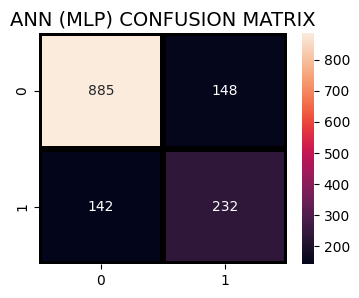

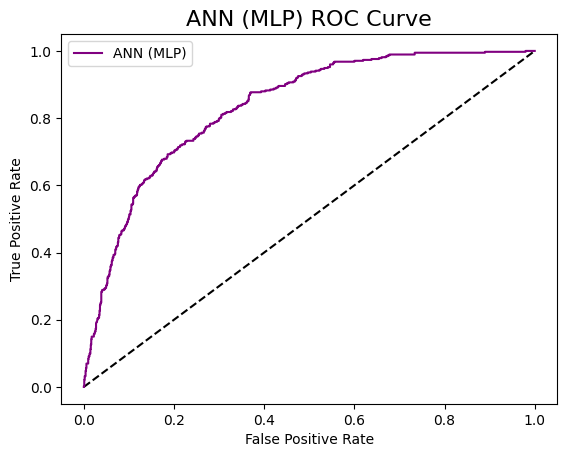

In [135]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, y_pred_mlpc),
                annot=True, fmt="d", linecolor="k", linewidths=3)
plt.title("ANN (MLP) CONFUSION MATRIX", fontsize=14)
plt.show()


fpr_mlpc, tpr_mlpc, thresholds = roc_curve(y_test, y_pred_proba_mlpc)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_mlpc, tpr_mlpc, label='ANN (MLP)', color="purple")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ANN (MLP) ROC Curve', fontsize=16)
plt.legend()
plt.show()

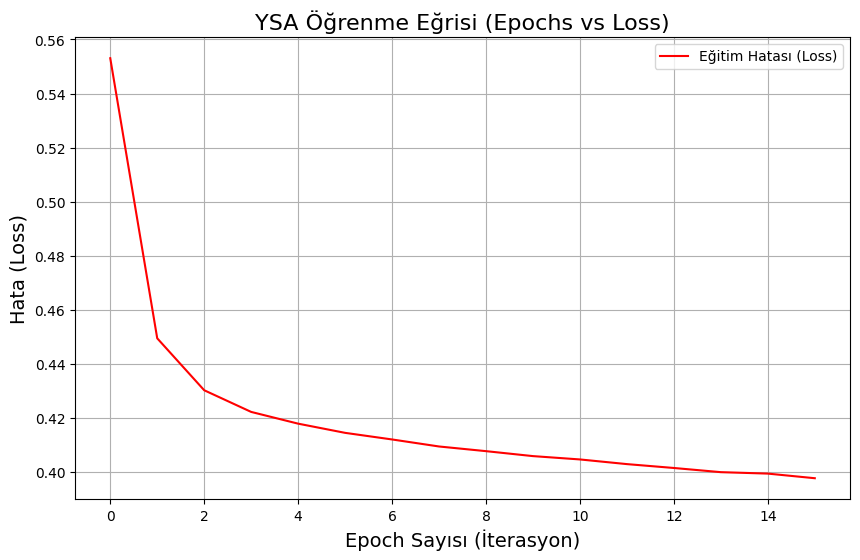

In [136]:
mlp_monitor = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, alpha=0.0001, 
                            solver='adam', random_state=42, 
                            early_stopping=True, validation_fraction=0.2)

mlp_monitor.fit(X_train_scaled, y_train)


loss_values = mlp_monitor.loss_curve_
val_scores = mlp_monitor.validation_scores_ 

plt.figure(figsize=(10, 6))
plt.plot(loss_values, label="Eğitim Hatası (Loss)", color="red")
plt.title("YSA Öğrenme Eğrisi (Epochs vs Loss)", fontsize=16)
plt.xlabel("Epoch Sayısı (İterasyon)", fontsize=14)
plt.ylabel("Hata (Loss)", fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

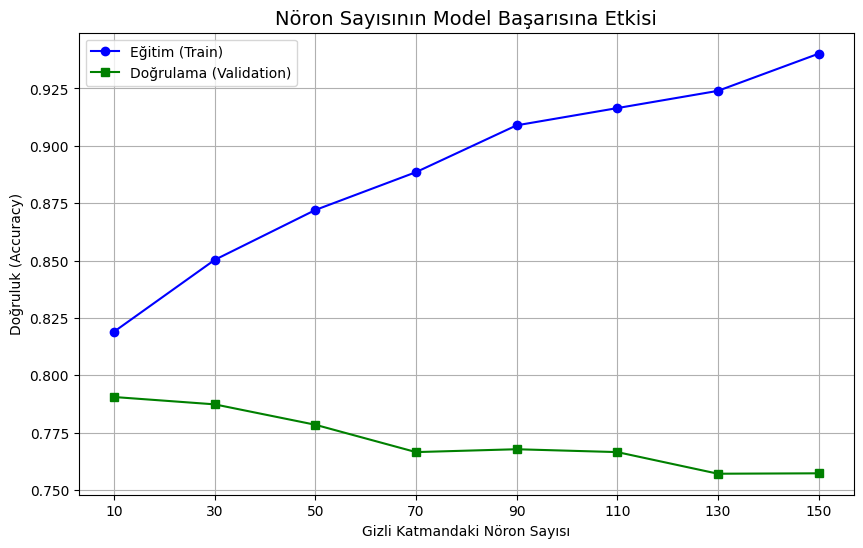

In [137]:
neuron_listesi = list(range(10, 160, 20))


hidden_layers = [(n,) for n in neuron_listesi]


train_scores, test_scores = validation_curve(
    MLPClassifier(random_state=42, max_iter=500), 
    X_train_scaled, y_train,
    param_name="hidden_layer_sizes",
    param_range=hidden_layers,
    cv=5,
    scoring="accuracy",
    n_jobs=-1
)


train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(10, 6))

plt.plot(neuron_listesi, train_mean, label="Eğitim (Train)", color="blue", marker='o')
plt.plot(neuron_listesi, test_mean, label="Doğrulama (Validation)", color="green", marker='s')

plt.title("Nöron Sayısının Model Başarısına Etkisi", fontsize=14)
plt.xlabel("Gizli Katmandaki Nöron Sayısı")
plt.ylabel("Doğruluk (Accuracy)")

plt.xticks(neuron_listesi)

plt.legend()
plt.grid(True)
plt.show()

In [138]:
print(" MODELLERİN KARŞILAŞTIRILMASI")


lr_f1 = f1_score(y_test, y_pred_lr)
rf_f1 = f1_score(y_test, y_pred_rf)
xgb_f1 = f1_score(y_test, y_pred_xgb)
knn_f1 = f1_score(y_test, y_pred_knn)
svc_f1 = f1_score(y_test, y_pred_svc)
dt_f1 = f1_score(y_test, y_pred_dt)
nb_f1 = f1_score(y_test, y_pred_nb)
ada_f1 = f1_score(y_test, y_pred_ada)
mlpc_f1 = f1_score(y_test, y_pred_mlpc)


karsilastirma_tablosu = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest', 'XGBoost', 'K-NN', 'SVC', 'Decision Tree', 'Naive Bayes', 'AdaBoost',  'MLP Classifier'],
    'CV Mean': [lr_cv_scores.mean(), rf_cv_scores.mean(), xgb_cv_scores.mean(), knn_cv_scores.mean(), svc_cv_scores.mean(), dt_cv_scores.mean(), nb_pipeline_cv_scores.mean(), ada_cv_scores.mean() , mlpc_cv_scores.mean()],
    'CV Std': [lr_cv_scores.std(), rf_cv_scores.std(), xgb_cv_scores.std(), knn_cv_scores.std(), svc_cv_scores.std(), dt_cv_scores.std(), nb_pipeline_cv_scores.std(), ada_cv_scores.std(),  mlpc_cv_scores.std()],
    'Test Accuracy': [lr_accuracy, rf_accuracy, xgb_accuracy, knn_accuracy, svc_accuracy, dt_accuracy, nb_accuracy, ada_accuracy, mlpc_accuracy ],
    'ROC-AUC': [lr_roc_auc, rf_roc_auc, xgb_roc_auc, knn_roc_auc, svc_roc_auc, dt_roc_auc, nb_roc_auc, ada_roc_auc, mlpc_roc_auc],
    'F1 Score': [lr_f1, rf_f1, xgb_f1, knn_f1, svc_f1, dt_f1, nb_f1, ada_f1, mlpc_f1]
})


karsilastirma_tablosu = karsilastirma_tablosu.sort_values(by='ROC-AUC', ascending=False).reset_index(drop=True)

print(karsilastirma_tablosu.to_string())


best_model_idx = karsilastirma_tablosu['ROC-AUC'].idxmax()
best_model_name = karsilastirma_tablosu.loc[best_model_idx, 'Model']
best_roc = karsilastirma_tablosu.loc[best_model_idx, 'ROC-AUC']
best_acc = karsilastirma_tablosu.loc[best_model_idx, 'Test Accuracy']
best_f1 = karsilastirma_tablosu.loc[best_model_idx, 'F1 Score']


print(f" EN BAŞARILI MODEL: {best_model_name}")
print(f" ROC-AUC Score : {best_roc:.4f}")
print(f" F1 Score      : {best_f1:.4f}")
print(f" Test Accuracy : {best_acc:.4f}")

 MODELLERİN KARŞILAŞTIRILMASI
                 Model   CV Mean    CV Std  Test Accuracy   ROC-AUC  F1 Score
0              XGBoost  0.781689  0.007555       0.793177  0.837545  0.573939
1        Random Forest  0.800178  0.015421       0.790334  0.836961  0.541213
2             AdaBoost  0.796800  0.013869       0.787491  0.835919  0.492360
3       MLP Classifier  0.756978  0.012065       0.793888  0.833975  0.615385
4  Logistic Regression  0.802133  0.011475       0.798152  0.833095  0.583578
5                 K-NN  0.769956  0.009464       0.791756  0.823716  0.591353
6                  SVC  0.801600  0.012638       0.792466  0.814121  0.549383
7          Naive Bayes  0.669156  0.007445       0.643923  0.810203  0.563208
8        Decision Tree  0.733867  0.008970       0.784648  0.810149  0.495840
 EN BAŞARILI MODEL: XGBoost
 ROC-AUC Score : 0.8375
 F1 Score      : 0.5739
 Test Accuracy : 0.7932
